# OpenCV Theory and Implementation

In [13]:
# OpenCV
# launched in 1999, written in C++
import cv2

# Read img from file
input = cv2.imread('./img/car.jpg')

# Show read img, first argument as the name of the window
cv2.imshow("screen", input)

# wait as much as milliseconds put in waitKey()
cv2.waitKey()

# Close the windows
cv2.destroyAllWindows()

In [54]:

# Shape of the img
input.shape

(1274, 1920, 3)

In [57]:
# Libs
import numpy as np
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

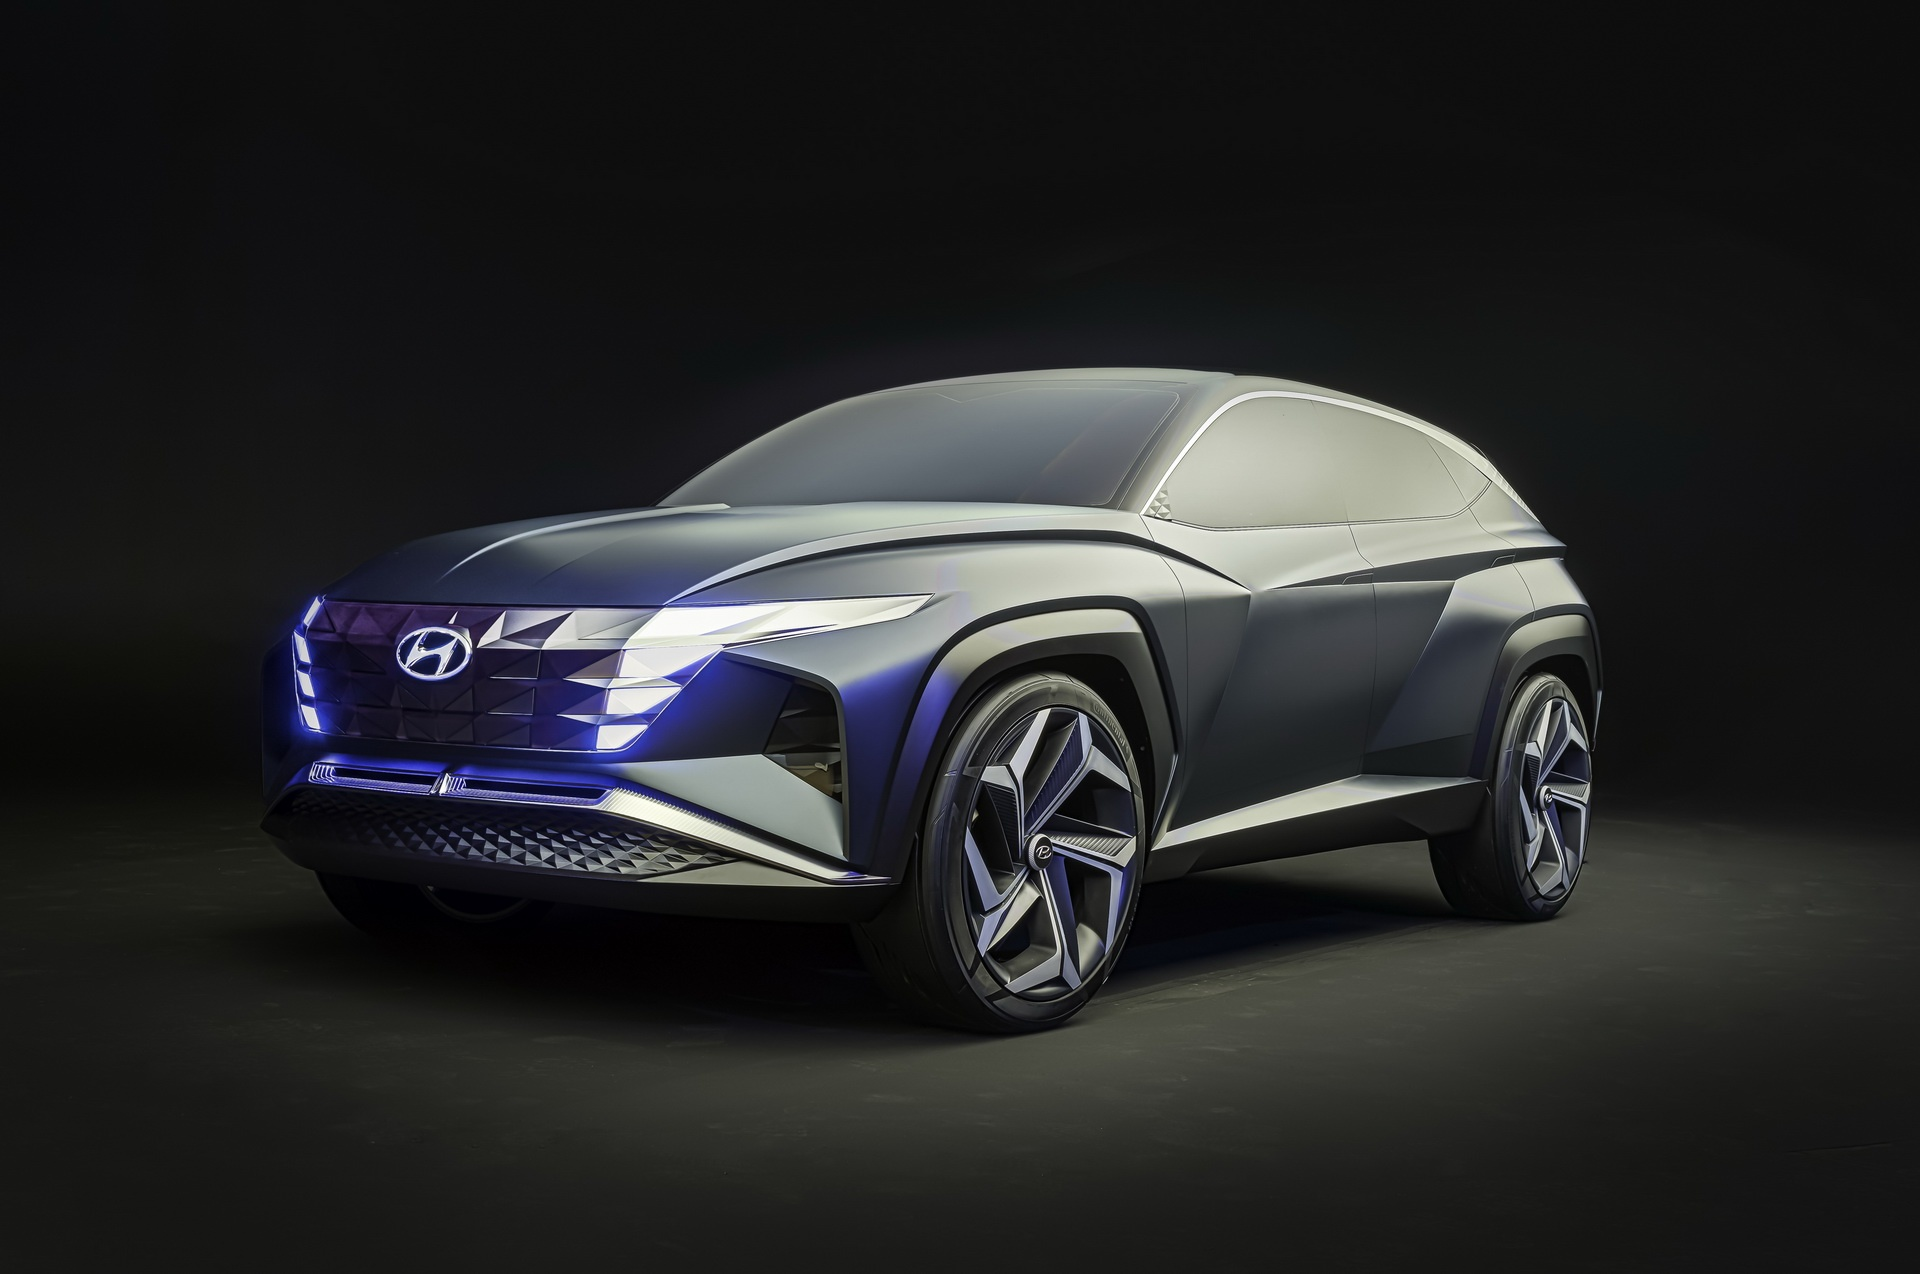

In [58]:
# Save the img
cv2.imwrite('writtten.jpg', input)
Image(filename='writtten.jpg') 

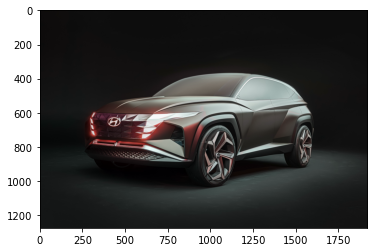

In [68]:
plt.imshow(input)

In [14]:
# Convert to grayscale
written = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)

# Read as grayscale
written_read = cv2.imread("writtten.jpg", 0)

# cv2.imshow("gray",written)
# cv2.waitKey()
# cv2.destroyAllWindows()

Color Spaces

In [23]:
# RGB - Red 0-255, Green 0-255, Blue 0-255
# HSV - Hue 0-179, Saturation 0-255, Value 0-255 - 
# CMYK - Cyan, Magenta, Yellow, Key
B, G, R = input[0, 0]
print (B, G, R)

14 12 12


In [25]:
input_gray = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)
input_gray.shape

(1274, 1920)

In [50]:
# Split and Merge functions for playing with color values of imgs
R,G,B = cv2.split(input)
# cv2.imshow("R", R)
# cv2.imshow("G", G)
# cv2.imshow("B", B)

# split the image and merge
merged_input = cv2.merge([B, R, G])
cv2.imshow("Merge", merged_input)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('merged.png', merged_input)

True

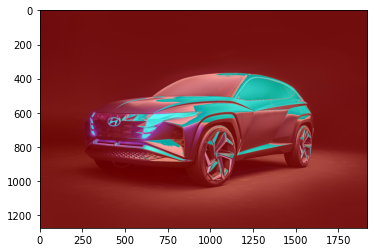

In [69]:
# Amplify any color code
merged_amp = cv2.merge([B+100, G, R])
cv2.imshow("amp", merged_amp)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(merged_amp)

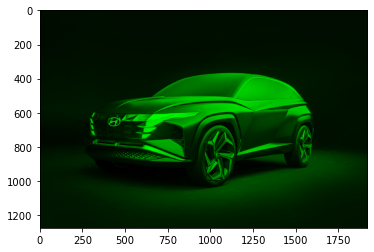

In [71]:
# Segregate each color code values
import numpy as np
zeros = np.zeros(input.shape[:2], dtype="uint8")
blue = cv2.merge([B, zeros, zeros])
green = cv2.merge([zeros, G, zeros])
red = cv2.merge([zeros, zeros, R])

cv2.imshow("blue", blue)
cv2.imshow("green", green)
cv2.imshow("red", red)

cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(green)

Transformations

In [74]:
# Affine and Non-affine transformations

# Affine - 
#     Scaling
#     Rotation
#         rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
#         img = cv2.warpAffine(img, rotation_matrix, (width, height))
#     Translation = 
#         T = np.float32([[1, 0, height/4], [0, 1, width/4]])
#         img = cv2.warpAffine(img, T, (height, width))

# Non-affine - not preserve parallelism, length, angle, but preserve collinearity and incidence - most common on CV apps
#     Homography
#     Projective Transform

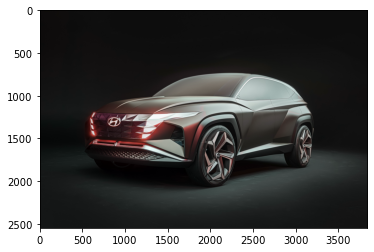

In [78]:
# Scaling, re-sizing, interpolations
input_scaled = cv2.resize(input, None, fx=0.75, fy=0.75)
cv2.imshow("scaling", input_scaled)

# double size
input_double = cv2.resize(input, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
cv2.imshow("double", input_double)

# exact dimensions
input_resize = cv2.resize(input, (900, 400), interpolation=cv2.INTER_AREA)
cv2.imshow("resi", input_resize)

cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(input_double)

Image Pyramids

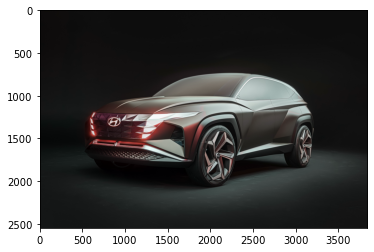

In [80]:
# Upscaling and downscaling imgs
small = cv2.pyrUp(input)
cv2.imshow("small", small)

large = cv2.pyrDown(input)
cv2.imshow("large", large)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(input_double)

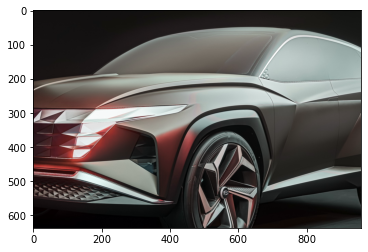

In [83]:
# Cropping images 
start_row, start_col = int(input.shape[0]*.25), int(input.shape[1]*.25) 
end_row, end_col = int(input.shape[0]*.75), int(input.shape[1]*.75) 
cropped_img = input[start_row:end_row, start_col:end_col]
cv2.imshow("cropped", cropped_img)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(cropped_img)

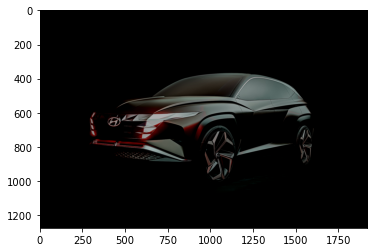

In [89]:
# Arithmetic operations - Brightening and Darkening Images
M = np.ones(input.shape, dtype="uint8")*75
added = cv2.add(input, M)
cv2.imshow('added', added)

subtracted = cv2.subtract(input, M)
cv2.imshow("subtract", subtracted)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(subtracted)

Bitwise operations and Masking

In [95]:
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2.imshow("square", square)
cv2.waitKey()

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2.imshow("ellipse",ellipse)
cv2.waitKey()
cv2.destroyAllWindows()

In [98]:
b_and = cv2.bitwise_and(square, ellipse)
cv2.imshow("and",b_and)
cv2.waitKey()

b_or = cv2.bitwise_or(square, ellipse)
cv2.imshow("or",b_or)
cv2.waitKey()

b_xor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("xor",b_xor)
cv2.waitKey()

b_not = cv2.bitwise_not(square, ellipse)
cv2.imshow("not",b_not)
cv2.waitKey()

cv2.destroyAllWindows()

Convolutions and Blurring

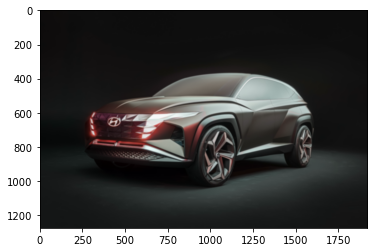

In [101]:
# Blurring - averaging the pixels around
kernel_3 = np.ones((3,3), np.float32) / 9
blurred_input = cv2.filter2D(input, -1, kernel_3)
cv2.imshow("blurred", blurred_input)
cv2.waitKey()

kernel_9 = np.ones((7,7), np.float32) / 49
blurred = cv2.filter2D(input, -1, kernel_9)
cv2.imshow("blurred2", blurred)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(blurred)

In [103]:
# Different types of blur
blur = cv2.blur(input, (3,3))
cv2.imshow("blur", blur)
cv2.waitKey()

gaussian = cv2.GaussianBlur(input, (7,7), 0)
cv2.imshow("gaus", gaussian)
cv2.waitKey()

median = cv2.medianBlur(input, 5)
cv2.imshow("median", median)
cv2.waitKey()

# Best in noise removal and keeping the sharp edges
# pixel difference is the key here. If the added pixel value is close to the central one, then it is 
# considered to be blurred
bilateral = cv2.bilateralFilter(input, 9, 75, 75)
cv2.imshow("bila", bilateral)
cv2.waitKey()
cv2.destroyAllWindows()

In [104]:
# Denoising - Non-local means Denoising
denoised = cv2.fastNlMeansDenoisingColored(input, None, 6, 6, 7, 21)
cv2.imshow("denoised", denoised)
cv2.waitKey()
cv2.destroyAllWindows()

Sharpening - Strengthening and Emphasizing edges

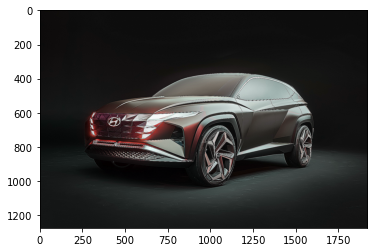

In [106]:
# matrix values are summed to one, no need to normalize
kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1], 
                            [-1, -1, -1]])
sharpened = cv2.filter2D(input, -1, kernel_sharpening)
cv2.imshow("sharpened", sharpened)
cv2.waitKey()
cv2.destroyAllWindows()
plt.imshow(sharpened)

Thresholding, Binarization, Adaptive Thresholding